# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Sommer, Luca

Datum: 09.11.2023

Gruppe: 31

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann man mit einem einfachen Versuchsaufbau und denen in diesem Versuch gewonnenen Daten die Wärmekapazität von bestimmten Materialien möglichst genau bestimmen? Wie signifikant ist die Abweichung der beiden Werte und woran könnte dies liegen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


Materialien:  
	Zwei Gefäße,
	Heißes und kaltes Wasser,
	Zwei Temperatursensoren,
	Raspberry Pi inklusive Bildschirm und Tastatur

Versuchsaufbau:
Man richtet sich einen Arbeitsplatz mit den genannten Materialien ein. Nun befüllt man ein Gefäß mit kaltem und ein anderes Gefäß mit heißem Wasser. Daneben platzieret man den Raspberry Pi zur Messung.

Durchführung:
Man schließt beide Temperatursensoren an den Raspberry Pi und startet das geschriebene Messprogramm. Nun legt man einen Temperatursensor in das kalte und den anderen in heißes Wasser. Das Messprogramm wird gestartet und man nimmt die Temperaturen auf. Danach mischt man heißes und kaltes Wasser und bestimmt mit beiden Sensoren in einem Gefäß die Temperatur und nimmt diese auf.


![Versuch1.1](figures/Versuch1_1.jpg)
![Versuch1.2](figures/Versuch1_2.jpg)

## Versuchsauswertung

In [145]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [146]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
# Den Dateipfad angeben um auf unsere Temperaturdaten zugreifen zu können.
path = 'data/data_heat_capacity/data_heat_capacity.h5'
data_path = "data/data_heat_capacity"
# DONE #

In [147]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
# Die Sensoren entsprechend Ihrer UUID angesprochen und die dazugehörigen Temperatur- und Zeitdaten ausgelesen.
s = h5.File(path,'r')
h = s["RawData"]
RawData = h["RawData"]

created = s.attrs["created"]
experiment = s.attrs["experiment"]
group_number = s.attrs["group_number"]
authors = s.attrs["authors"]

UUID = list(RawData.keys())
sensor1_path = "RawData/RawData/"+UUID[0]
sensor2_path = "RawData/RawData/"+UUID[1]
sensor1 = s[sensor1_path]
sensor2 = s[sensor2_path]
temp1 = list(sensor1["temperature"])
temp2 = list(sensor2["temperature"])
time1 = list(sensor1["time step"])
time2 = list(sensor2["time step"])

# DONE #

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in Grad Celsius')

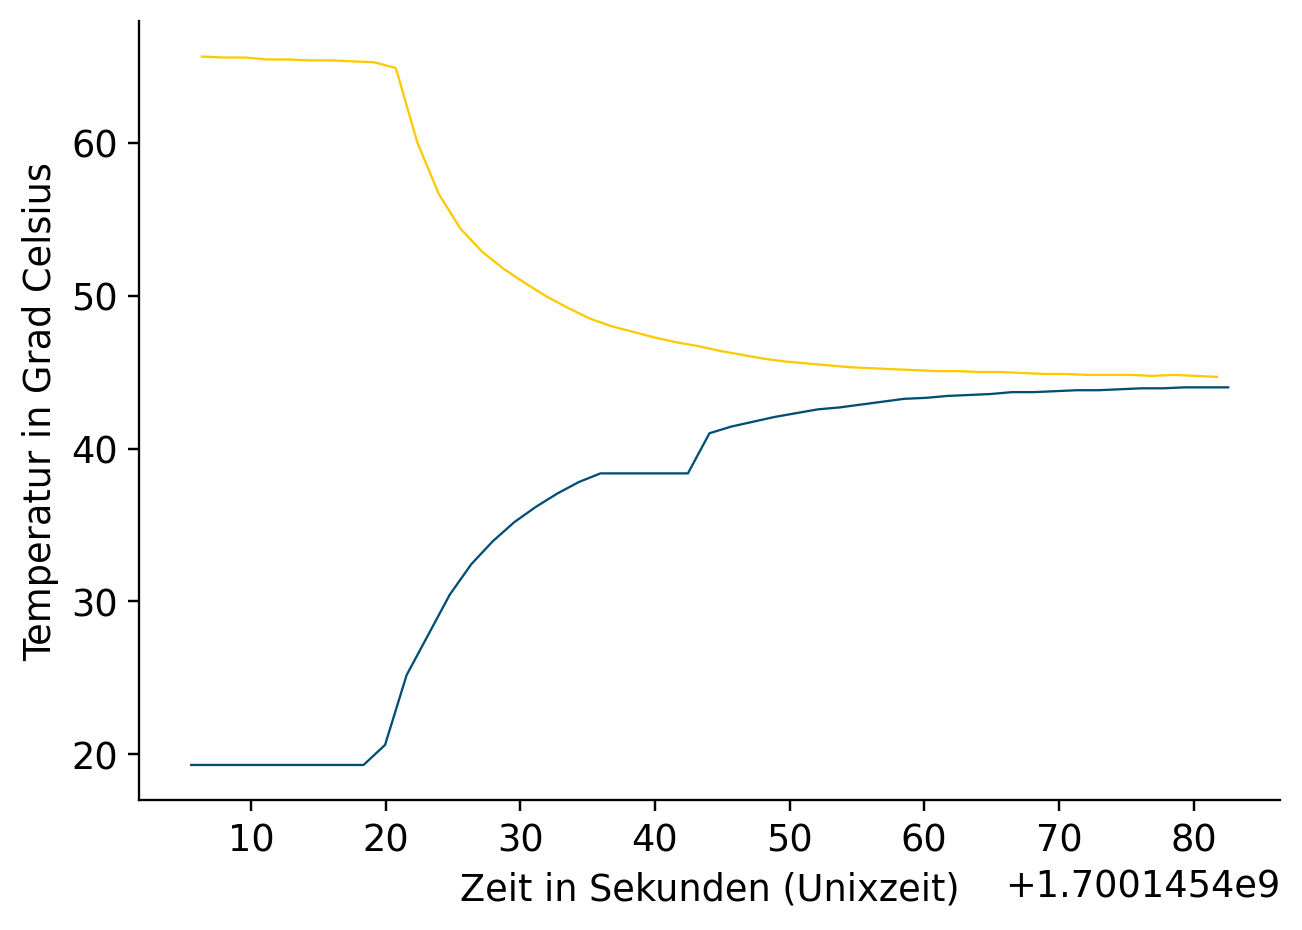

In [148]:
# TODO: Use the temperature and time data for plotting
# Temperatur über die Zeit aufgetragen, um die Temperaturverläufe erkennen zu können.
fig = plt.figure()
plt.plot(time1,temp1)
plt.plot(time2,temp2)
plt.xlabel("Zeit in Sekunden (Unixzeit)")
plt.ylabel("Temperatur in Grad Celsius")
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [149]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
# Die Massen der entsprechenden Wassermengen übergeben.
mass_cold_water = float(m_json.get_json_entry(data_path, "1ee7fb8c-9d3f-64c4-90a6-0eebded634d9",["probe", "mass_cold_water"]))
mass_hot_water = float(m_json.get_json_entry(data_path,"1ee7fb8c-9d3f-64c4-90a6-0eebded634d9",["probe", "mass_hot_water"]))
# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [150]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
# Unsere für die Berechnung geforderten Temperaturen hinterlegen.
T_1 = max(temp2)
T_2 = min(temp1)
T_M = temp2[-1]
# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [151]:
# TODO: Calculate heat capacity of the calorimeter
# Wärmekapazität an Hand der Formel bestimmen.
C = ((mass_cold_water*water_heat_capa*(T_2-T_M))/(T_M-T_1))-mass_hot_water*water_heat_capa
# DONE #

#### (Vi) Ergebnis

In [152]:
# TODO: Print result
# Ausgabe meiner Wärmekapazität.
print(C)
# DONE #

0.11350883582089544


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität von Porzellan liegt bei etwa 1.2. Mein Versuch hat nur einen Wert von lediglich 0.114 ergeben. Dies ist eine signifikante Abweichung. Meine Forschungsfrage kann ich in diesem Versuch nicht bestätigen. Die Ursache hierfür sehe ich in der Versuchsumgebung. Zu viele äußere Einflüsse können das Messergebnis verfälschen. Zudem könnte eine längere Messzeit die Ergebnisse positiv beeinflussen. Es liegen also schon zwei Faktoren vor, die ein Grund für die Abweichung sein könnten.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich denke, dass der negative Ausgang meines Versuchs äußeren Einflüssen geschuldet ist. In einer anderen Versuchsumgebung, mit anderen Sensoren und der Anpassung weiterer Versuchsparameter sollte der Versuch jedoch gelingen. Grundsätzlich funktioniert die Messung jedoch und liefert plausible Ergebnisse, die jedoch in einer Größenordnung zehn voneinander abweichen. Ich würde daher meinen Versuch bezogen auf meine Forschungsfrage nicht als gescheitert ansehen. Die Abweichung der beiden Wärmekapazitäten ist zwar groß, die Messung an sich hat hier funktioniert. Die Abweichung liegt meiner Ansicht nach in der Beeinflussung durch äußere Größen. 